In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

### Recall: Logistic Regression Model for Titanic Survival

In [2]:
titanic = pd.read_csv('../data/titanic.csv')

In [3]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [4]:
titanic = titanic.drop(columns = 'Name')
titanic = pd.get_dummies(titanic, columns = ['Sex', 'Pclass'], drop_first = True)

In [5]:
X = titanic.drop(columns = 'Survived')
y = titanic.Survived

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321)

In [7]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

### How did we do on the training set?

In [8]:
y_pred_train = logistic_model.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))

0.8045112781954887


### What about on the test set?

In [9]:
y_pred = logistic_model.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.8288288288288288


## What if we try a more flexible model?

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#import graphviz
from IPython.display import SVG

We'll start by building a single decision tree classifier.

In [11]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

## How did we do on the training set?

In [12]:
y_pred_train = tree.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))

0.98796992481203


## 98.8% accuracy!!! What about on the test set?

In [13]:
y_pred = tree.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.7657657657657657


What happened!? Let's see how our model is making predictions.

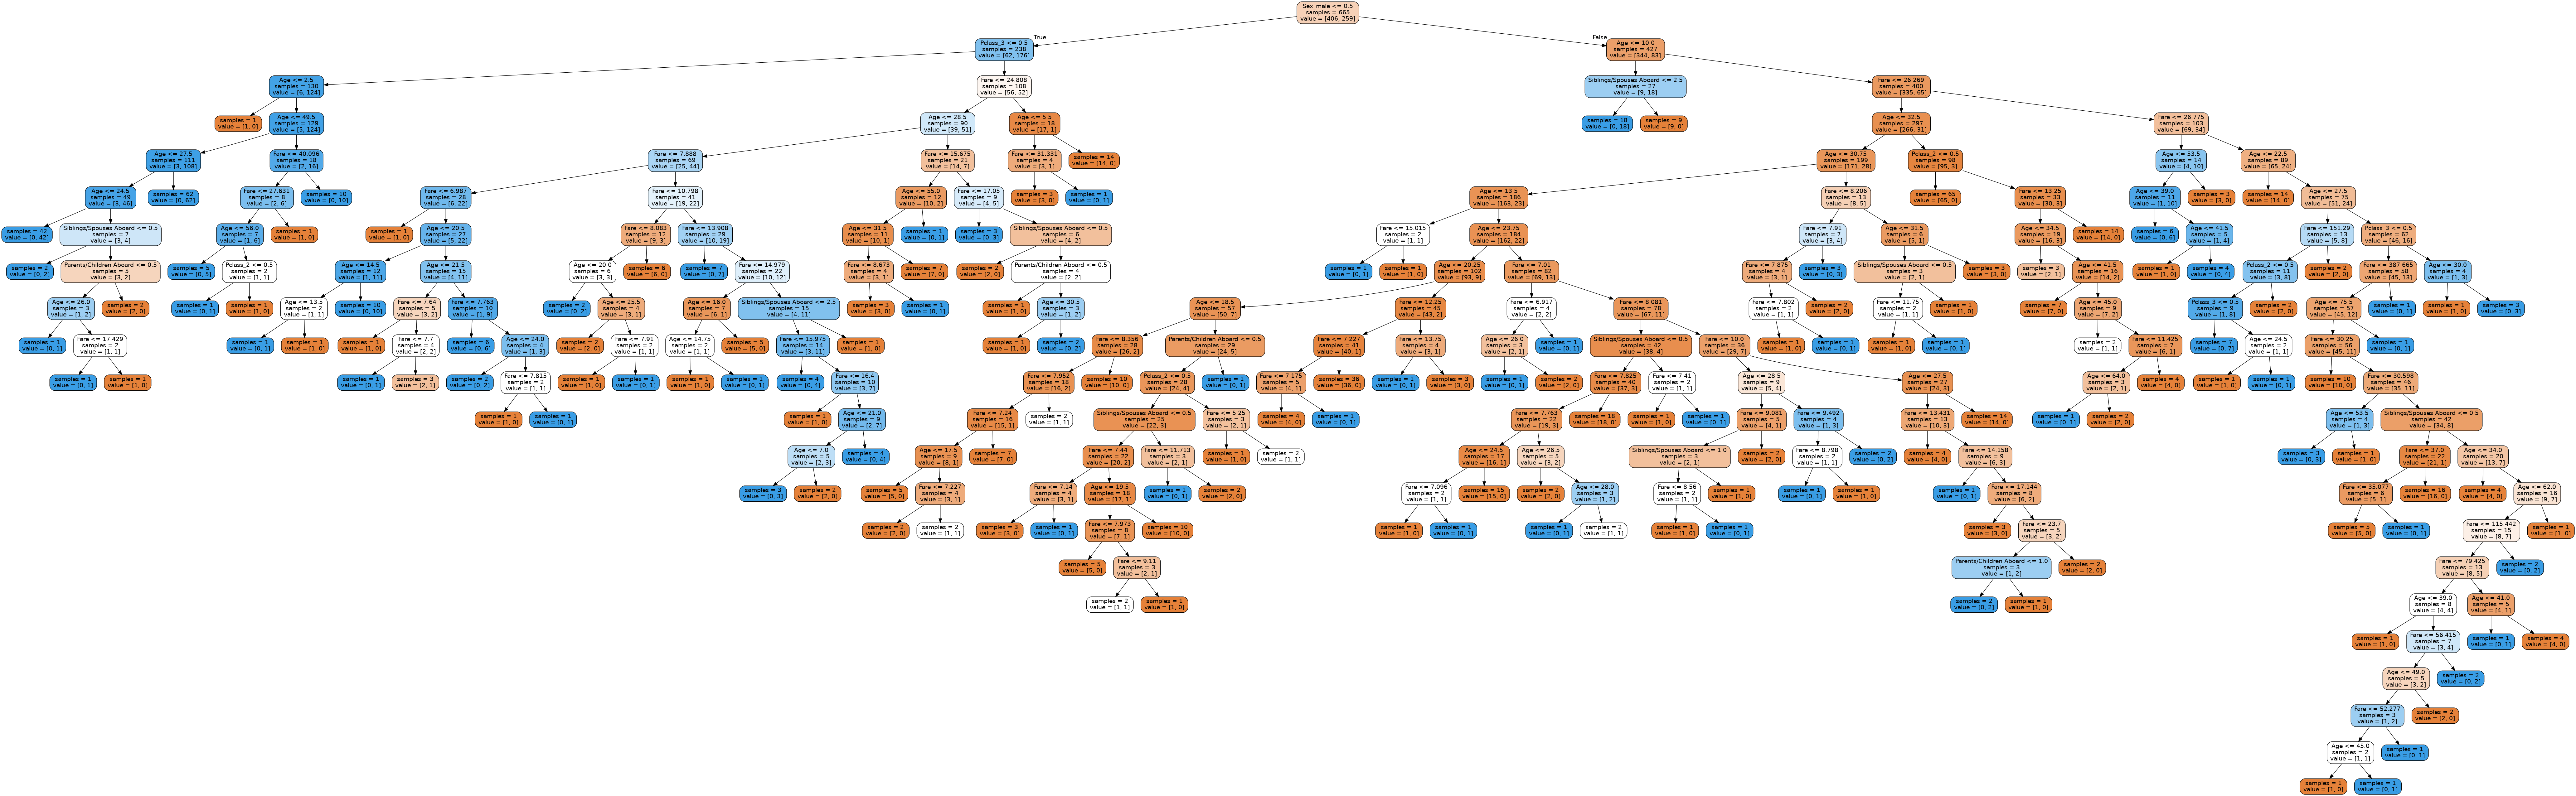

In [14]:
#export_graphviz(tree, 'tree.dot', feature_names = X.columns, filled=True, rounded=True, special_characters=False, impurity=False)

#! dot -Tpng tree.dot -o tree.png

from IPython.display import Image
Image(filename='../assets/tree.png') 

The problem is that our model essentially memorizes the training set without trying to uncover patters that it could generalize.

To correct for this problem, we can take an ensemble approach, which means that we will build many decision trees on subsets of the features and data and then average the predictions of all of the trees. This will force our model to try and find more general patterns that will work on the test set.

In [15]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

## Training Set Accuracy:

In [16]:
y_pred_train = forest.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))

0.98796992481203


## Test Set Accuracy:

In [17]:
y_pred = forest.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7927927927927928


We see some improvement over using a single tree, but we could do better. Random forests have a lot of hyperparameters that can be tuned to improve out model. Here are a few of these parameters:

* **n_estimators:** Number of decision trees to train. Default is 10. More trees = less variance, but slower to train and predict
* **max_depth:** Maximum depth (number of splits). By default, there is no max depth.
* **min_samples_leaf:** Minimum number of samples per leaf. Setting this higher keeps the decision trees from paying too much attention to any single data point.

These parameters can be tuned to try to improve the model that you get, and there are ways to automatically tune these parameters. See, for example, sklearn's GridSearchCV or RandomSearchCV.

In [18]:
forest = RandomForestClassifier(n_estimators = 1000, max_depth = 5, min_samples_leaf = 5)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=1000)

In [19]:
y_pred_train = forest.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))

0.8586466165413534


In [20]:
y_pred = forest.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8288288288288288


A nice perk of using random forest models is that we can see which features are the most important in making predictions.

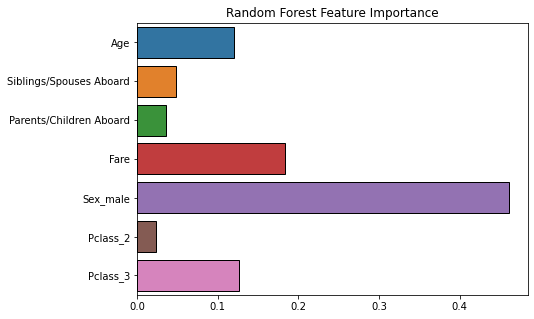

In [21]:
fig, ax = plt.subplots(figsize = (7,5))
sns.barplot(x = forest.feature_importances_, y = list(X.columns), ax = ax, edgecolor = 'black')
plt.title('Random Forest Feature Importance');